In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import parameters as p
import pickle
%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

/tmp/ipykernel_153226/3144901383.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cargado de datos

In [2]:
''' PARÁMETROS '''

INPUT_FOLDER = os.path.abspath("input")
CICLO = 9
SECTORES = [5, 6]

folder_ciclo = os.path.join(INPUT_FOLDER, f"ciclo_{CICLO}")

In [3]:
''' DESCARGAS '''
suffix_input = '_'.join([str(s) for s in SECTORES])
df_descargas = pd.read_csv(os.path.join(folder_ciclo, "input_sectores_{}.csv".format(suffix_input)), parse_dates=['fecha'])

In [4]:
''' RUTAS '''
ruta_topografia = os.path.join(folder_ciclo, "DEM_04.02.2023_10x10m.asc")
ruta_mascara_tranque = p.RUTA_MASK_TRANQUE
ruta_sector_5 = os.path.join(folder_ciclo, "poligono_sector_5.csv")
ruta_interior = os.path.join(folder_ciclo, "zona_interior_sector_5.csv")
ruta_extension_sector_5 = os.path.join(folder_ciclo, "extension_sector_5.csv")

In [5]:
''' MALLADO '''
res_region = 1024
res_interior = res_region / 2

# Construcción input

In [6]:
df_input = df_descargas[df_descargas.sector == 5]
df_input = df_input[df_input.fecha == df_input.fecha.min()]

In [7]:
# resoluciones_region = [2**x for x in range(7, 11)]

# Ejecución simulación

In [8]:
from simulador import AnugaSW

simulador = AnugaSW(ruta_topografia,
                    ruta_mascara_tranque,
                    ruta_sector_5, ruta_interior,
                    ruta_extension_sector_5,
                    res_region=res_region,
                    res_interior=res_interior)


Figure files for each frame will be stored in figuras


In [9]:
df_input

,fecha,sector,id_punto,coordenada_x,coordenada_y,angulo_polar,tms,tasa_diaria,radio_canaleta
153,2023-03-02,5,29,489215.492474,7.297292e+06,2.425051,22137.258627,0.961598,1.6345
154,2023-03-02,5,32,489082.721325,7.296706e+06,2.536601,22137.258627,0.961598,1.4370
155,2023-03-02,5,33,488926.557163,7.296312e+06,2.907850,22137.258627,0.961598,1.6430
156,2023-03-02,5,37,488770.083732,7.295805e+06,2.377836,44274.517254,1.923196,1.3145


In [10]:
simulador.ejecutar(df_input)

Time = 0.0000 (sec), steps=0 (1s)
Distancias a los bordes: {0: inf, 1: inf}



/home/jorge-ovalle/anuga_core/anuga_jorge/estado.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._df_estado = pd.concat([self._df_estado, df_aux], ignore_index=True)


Time = 400.0000 (sec), delta t = 1000.00000000 (s), steps=1 (0s)
Distancias a los bordes: {0: 479.092154173782, 1: 852.4007012872297}

Time = 800.0000 (sec), delta t in [0.78586877, 3.18307476] (s), steps=159 (1s)
Distancias a los bordes: {0: 386.93293070602186, 1: 593.0015313710309}

Time = 1200.0000 (sec), delta t in [2.69680622, 3.13931418] (s), steps=145 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 418.3797022133377}

Time = 1600.0000 (sec), delta t in [2.78775210, 2.82488639] (s), steps=143 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 300.05689194916465}

Time = 2000.0000 (sec), delta t in [2.82490081, 2.82885167] (s), steps=142 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 245.28411967664024}

Time = 2400.0000 (sec), delta t in [2.82885330, 2.82904220] (s), steps=142 (1s)
Distancias a los bordes: {0: 377.32401928025456, 1: 215.8905631259412}

Time = 2800.0000 (sec), delta t in [2.82900512, 2.82905956] (s), steps=142 (1s)
Distancias a los bordes:

In [11]:
# columns = ['tiempo_sim', 'tiempo_inicio_paso', 'elapsed']
# df = pd.DataFrame(columns=['tiempo_sim', 'tiempo_inicio_paso',
#                                                 'elapsed'])

# df1 = pd.concat([df, pd.DataFrame(data = [[0,0,1]], columns=columns)], axis=0)



# arr = simulador.domain.quantities['elevation'].save_to_array(cellsize=10,
#                                                    easting_min=simulador.topografia.dem.columns.min(),
#                                                    northing_min=simulador.topografia.dem.index.min(),
#                                                    easting_max=simulador.topografia.dem.columns.max(),
#                                                    northing_max=simulador.topografia.dem.index.max())

# Debugging

## Guardado

In [11]:
# DEBUGGING 

from copy import deepcopy
# centroides_old = simulador.centroides_old
# centroides_new = simulador.centroides_new
# stage_old = simulador.stage_old
# stage_new = simulador.stage_new
# triang_old = simulador.triang_old
# triang_new = simulador.triang_new
dominio_old = deepcopy(simulador.dominio_old)
dominio_new = deepcopy(simulador.dominio_new)
dplotter_old = deepcopy(simulador.dplotter_old)
dplotter_new = deepcopy(simulador.dplotter_new)

In [14]:
# Guardamos los datos en formato pickle
with open('debugging.pkl', 'wb') as f:
    pickle.dump([dominio_old, dominio_new, dplotter_old, dplotter_new], f)

AttributeError: Can't pickle local object 'Inlet_operator.set_default.<locals>.<lambda>'

## Cargado

In [17]:
# Cargamos los datos en formato pickle
# with open('debugging.pkl', 'rb') as f:
#     centroides_old, centroides_new, stage_old, stage_new, triang_old, triang_new = pickle.load(f)

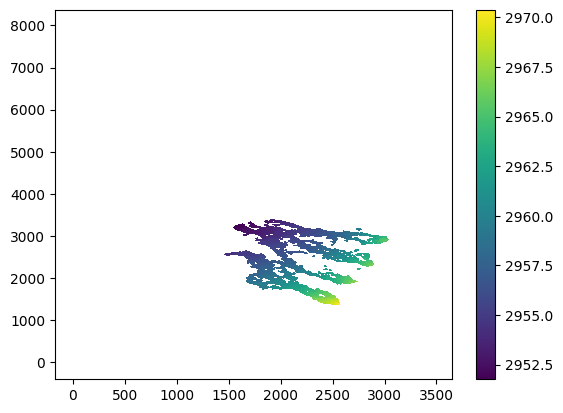

In [12]:
stage_old = dominio_old.quantities['stage'].centroid_values
plt.tripcolor(dplotter_old.triang, stage_old, cmap='viridis')
plt.colorbar()

In [13]:
elevation_old = dominio_old.quantities['elevation'].centroid_values
depth_old = stage_old - elevation_old

In [14]:
print('Número de wet triangles_old proporcion:', np.sum(depth_old > 1e-12) / len(depth_old))

Número de wet triangles_old proporcion: 0.26369515258404147


In [15]:
stage_new = dominio_new.quantities['stage'].centroid_values
elevation_new = dominio_new.quantities['elevation'].centroid_values
depth_new = stage_new - elevation_new

print('Número de wet triangles_new proporcion:', np.sum(depth_new > 1e-12) / len(depth_new))

Número de wet triangles_new proporcion: 0.9482036665611034


## Convertir `stage` a archivo `.asc`

In [44]:
from topografia import Topografia

In [45]:
# Creamos un objeto topografia para guardar depth

dem_depth = deepcopy(simulador.topografia.dem)
dem_area = deepcopy(simulador.topografia.dem)

dem_depth[~dem_depth.isna()] = 0
dem_area[~dem_area.isna()] = 0

depth_topo = Topografia(dem=dem_depth)
area_topo = Topografia(dem=dem_area)

In [46]:
depth_old = dominio_old.quantities['stage'].centroid_values - dominio_old.quantities['elevation'].centroid_values

In [47]:
from collections import defaultdict

In [48]:
def get_intersection_area(depth_topo, xc, yc, cellsize):

    # Generamos una lista de los puntos del cuadrado centroide

    puntos = [(xc - cellsize/2, yc - cellsize/2),
              (xc + cellsize/2, yc - cellsize/2),
              (xc + cellsize/2, yc + cellsize/2),
              (xc - cellsize/2, yc + cellsize/2)]
    
    indices_topo = defaultdict(set)
    areas_topo = {}

    # Iteramos sobre los puntos rellenando primero indices_topo
    for xe, ye in puntos:
        try:
            # Buscamos las coordenadas proyectadas
            x, y = depth_topo.determinar_proyeccion(xe, ye)
            indices_topo[(x, y)].add((xe, ye))
        except:
            continue

    for xy, puntos in indices_topo.items():
        puntos = list(puntos)

        inf_limitx = max(min(p[0] for p in puntos), xy[0])
        sup_limitx = min(max(p[0] for p in puntos), xy[0] + depth_topo.cellsize)
        base = sup_limitx - inf_limitx

        print(inf_limitx, sup_limitx, base)

        inf_limity = max(min(p[1] for p in puntos), xy[1])
        sup_limity = min(max(p[1] for p in puntos), xy[1] + depth_topo.cellsize)
        altura = sup_limity - inf_limity

        print(inf_limity, sup_limity, altura)
        print()

        area = base * altura
        areas_topo[xy] = area

    return areas_topo

In [49]:
wet_indices = dominio_old.get_wet_elements()
wet_centroids = dominio_old.get_centroid_coordinates(absolute=True)[wet_indices]
cellsize = np.sqrt(simulador.res_region)


for (xc, yc), idx in list(zip(wet_centroids, wet_indices)):
    h = depth_old[idx] 
    areas_topo = get_intersection_area(depth_topo, xc, yc, cellsize)
    for xy, area in areas_topo.items():
        value = area * h + depth_topo.get_value(*xy)
        # print(value)
        depth_topo.set_value(*xy, value)

        area_value = area + area_topo.get_value(*xy)
        area_topo.set_value(*xy, area_value)

488524.3720676342 488524.3720676342 0.0
7296390.209251496 7296390.209251496 0.0

488556.3720676342 488556.3720676342 0.0
7296390.209251496 7296390.209251496 0.0

488556.3720676342 488556.3720676342 0.0
7296422.209251496 7296422.209251496 0.0

488524.3720676342 488524.3720676342 0.0
7296422.209251496 7296422.209251496 0.0

487822.5771069878 487822.5771069878 0.0
7296978.880135372 7296978.880135372 0.0

487854.5771069878 487854.5771069878 0.0
7296978.880135372 7296978.880135372 0.0

487854.5771069878 487854.5771069878 0.0
7297010.880135372 7297010.880135372 0.0

487822.5771069878 487822.5771069878 0.0
7297010.880135372 7297010.880135372 0.0

488149.579370068 488149.579370068 0.0
7296351.883553031 7296351.883553031 0.0

488181.579370068 488181.579370068 0.0
7296351.883553031 7296351.883553031 0.0

488181.579370068 488181.579370068 0.0
7296383.883553031 7296383.883553031 0.0

488149.579370068 488149.579370068 0.0
7296383.883553031 7296383.883553031 0.0

488222.695227353 488222.695227353 0.

In [29]:
wet_indices.shape


(4713,)

In [22]:
depth_topo.dem = depth_topo.dem / area_topo.dem

In [19]:
depth_topo.determinar_proyeccion(x, y)

(488532.367, 7295647.51)

In [20]:
depth_topo.calcular_altura_punto(x, y)

0.0

In [27]:
(depth_topo.dem > 0).sum().sum()

0

In [213]:
mask_aux = depth_aux >= 0.01
depth_aux[~mask_aux] = 0

In [228]:
depth_aux = stage_new - dominio_new.quantities['elevation'].centroid_values

mask = depth_aux > 0.01
depth_aux[~mask] = 0

In [234]:
depth_aux[depth_aux > 0].min()

0.010000171127558133

In [26]:
dic = {}

dic[(1, 2)] = 3

In [238]:
dplotter_new.triang

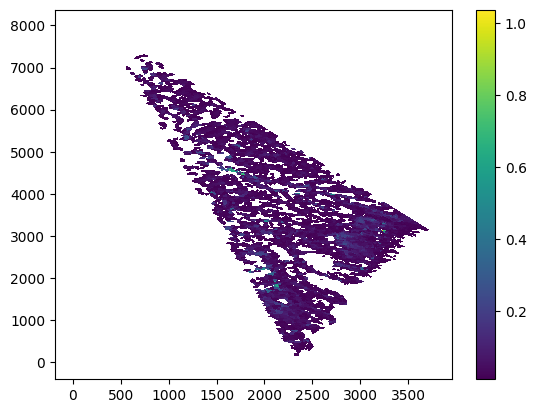

In [242]:
# depth_new = stage_aux - dominio_new.quantities['elevation'].centroid_values

dplotter_new.triang.set_mask(depth_aux <= 0.01)
plt.tripcolor(dplotter_new.triang, depth_aux, cmap='viridis')
plt.colorbar()


In [245]:
np.isinf(depth_aux).sum()

9663

In [26]:
from copy import deepcopy
hola = deepcopy(simulador.stage_new)

In [16]:
print('Nans:', np.isnan(stage_old).sum())
print('Inf:', np.isinf(stage_old).sum())

Nans: 0
Inf: 0


In [17]:
print('Nans:', np.isnan(stage_new).sum())
print('Inf:', np.isinf(stage_new).sum())

Nans: 370
Inf: 9663


In [123]:
from shapely import Polygon

In [130]:
# MUY LENTO

triangs_old = dominio_old.triangles
nodes_old = dominio_old.get_nodes(absolute=True)
triangs_new = dominio_new.triangles
nodes_new = dominio_new.get_nodes(absolute=True)

# Creamos los poligonos
triangulos_old = []
triangulos_new = []

for i in range(triangs_old.shape[0]):
    t_old = []
    for idx in triangs_old[i]:
        t_old.append(nodes_old[idx])
    triangulos_old.append(Polygon(t_old))

    t_new = []
    for idx in triangs_new[i]:
        t_new.append(nodes_new[idx])
    triangulos_new.append(Polygon(t_new))

stage_aux = []

for ntriang in triangulos_new:
    h = 0
    total_area = 0
    for otriang in triangulos_old:
        inter_area = ntriang.intersection(otriang).area
        h += inter_area * stage_old[triangulos_old.index(otriang)]

        total_area += inter_area
    stage_aux.append(h/total_area)


    # t_old = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))

KeyboardInterrupt: 

In [144]:

triangs_old = dominio_old.triangles
nodes_old = dominio_old.get_nodes(absolute=True)
triangs_new = dominio_new.triangles
nodes_new = dominio_new.get_nodes(absolute=True)

# Creamos los poligonos
triangulos_old = []
triangulos_new = []

for i in range(triangs_old.shape[0]):
    t_old = []
    for idx in triangs_old[i]:
        t_old.append(nodes_old[idx])
    triangulos_old.append(t_old)

    t_new = []
    for idx in triangs_new[i]:
        t_new.append(nodes_new[idx])
    triangulos_new.append(t_new)

In [184]:
depth = stage_old - dominio_old.quantities['elevation'].centroid_values

In [190]:
(depth < 1e-10).sum()

13797

In [210]:
from scipy.interpolate import RBFInterpolator
interpolador = RBFInterpolator(y=dominio_old.get_centroid_coordinates(absolute=True), d=depth)

In [223]:
from scipy.interpolate import LinearNDInterpolator

centroids = dominio_old.get_centroid_coordinates(absolute=True)
wet_indices = dominio_old.get_wet_elements()
wet_centroids = centroids[wet_indices]

wet_stage = dominio_old.quantities['stage'].centroid_values[wet_indices]

interpolador = LinearNDInterpolator(wet_centroids, wet_stage, fill_value=0)

stage_aux = interpolador(dominio_new.get_centroid_coordinates(absolute=True))

In [222]:
(stage_aux == 0).sum()

22030

In [ ]:
dominio_old.set_minimum_allowed_height()

In [160]:
from matplotlib.tri import Triangulation, LinearTriInterpolator, CubicTriInterpolator

#you can add keyword triangles here if you have the triangle array, size [Ntri,3]
triobj_old = Triangulation(triangles=triangs_old, x=nodes_old[:,0], y=nodes_old[:,1])

# Valores en los vertices
stage_old = dominio_old.quantities['stage'].get_values(location='vertices')

# #linear interpolation
fz = LinearTriInterpolator(triobj_old, stage_old)
Z = fz(0, 0)

ValueError: z array must have same length as triangulation x and y arrays

In [172]:
triobj_old.get_masked_triangles()

array([[2969.5285224 , 2969.5285224 , 2969.5285224 ],
       [2972.4552859 , 2972.4552859 , 2972.4552859 ],
       [2972.55326892, 2972.55326892, 2972.55326892],
       ...,
       [2940.49397753, 2940.49397753, 2940.49397753],
       [2940.53992953, 2940.53992953, 2940.53992953],
       [2940.51091838, 2940.51091838, 2940.51091838]])

In [171]:
triobj_old

In [133]:
wet_indices = dominio_old.get_wet_elements()

In [139]:
dominio_old.triangles[wet_indices]

array([[ 545,  549,  483],
       [2900, 2015, 1930],
       [1389, 7251, 1390],
       ...,
       [5792, 9489, 5689],
       [7981, 9489,  509],
       [7956, 9520, 7954]])

In [120]:
triangs_old = dominio_old.get_nodes(absolute=True)

In [162]:
triangs_old.shape

(18711, 3)

In [126]:
dominio_old.get_vertex_coordinates(triangle_id=0)

array([[2339.91724216, 1233.77231969],
       [2345.36691871, 1273.51051837],
       [2305.23712105, 1245.77551753]])

In [64]:
aux_stage = dominio_new.quantities['stage'].get_values(interpolation_points=dominio_old.get_centroid_coordinates(absolute=True))

In [65]:
# dominio_old.set_quantity('stage', numeric=aux_stage, location='centroids')

stage_old = dominio_old.quantities['stage'].centroid_values

In [66]:
(aux_stage != stage_old).sum()

18213

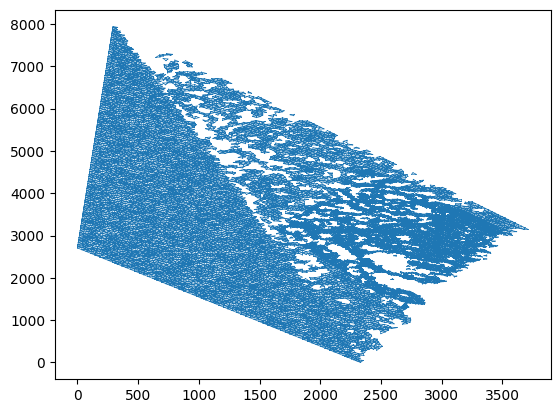

In [69]:
plt.triplot(dplotter_new.triang, linewidth=0.5)

In [96]:
from shapely import Polygon

# Creamos un polígono con las coordenadas de los centroides
poligono1 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=0))
poligono2 = Polygon(simulador.domain.get_vertex_coordinates(triangle_id=1))

In [95]:
simulador.domain.areas

array([824.19862193, 275.83180723, 727.26806099, ..., 517.4030943 ,
       479.29731789, 391.3754843 ])

In [97]:
inter = poligono1.intersection(poligono2)

In [99]:
inter.area

0.0